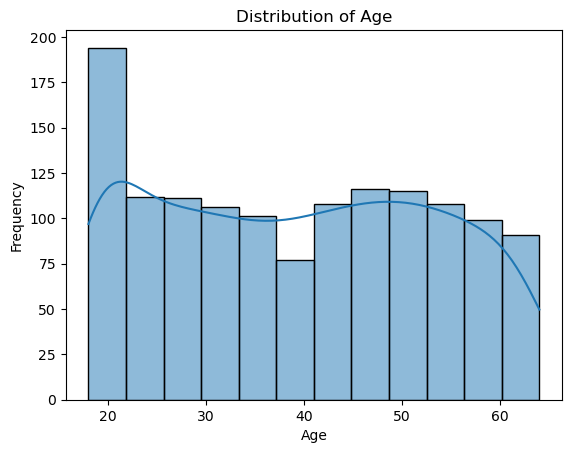

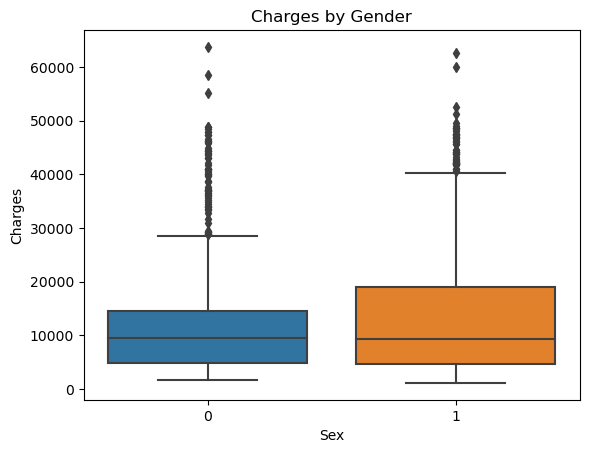

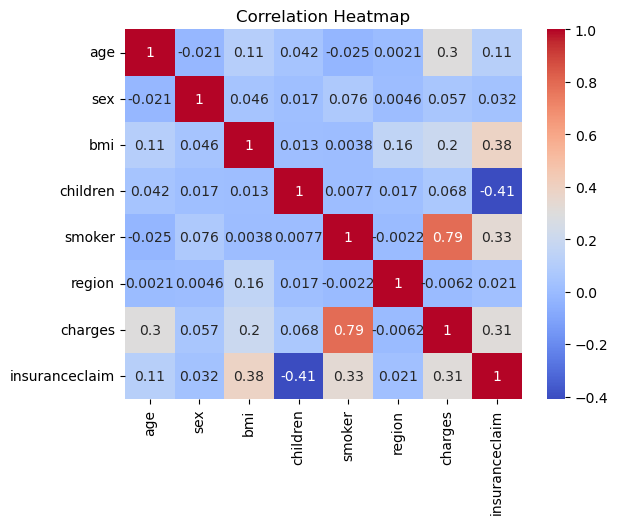

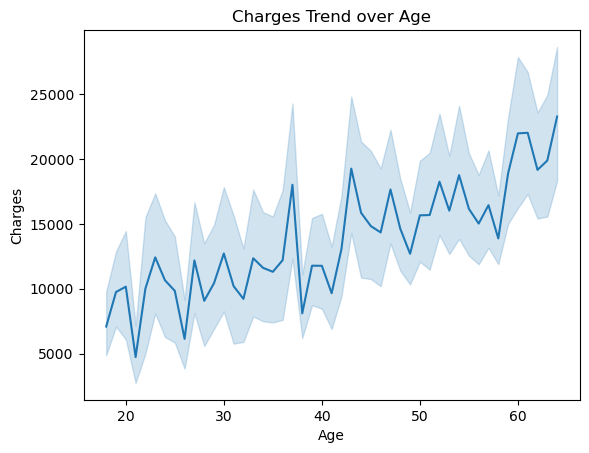

Evaluation Results:
Logistic Regression: {'Accuracy': 0.7947761194029851, 'Precision': 0.797752808988764, 'Recall': 0.8819875776397516, 'F1 Score': 0.8377581120943952}
Decision Tree: {'Accuracy': 0.9776119402985075, 'Precision': 0.9754601226993865, 'Recall': 0.9875776397515528, 'F1 Score': 0.9814814814814815}
Neural Network: {'Accuracy': 0.5746268656716418, 'Precision': 0.6146341463414634, 'Recall': 0.782608695652174, 'F1 Score': 0.6885245901639344}


C:\Users\heave\AppData\Local\Temp\ipykernel_25872\13326028.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


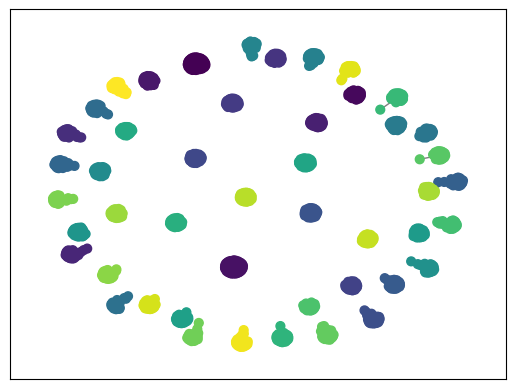

Detected Communities:
Community 0: [19, 16884.924, 1837.237, 4687.797, 1625.43375, 1743.214, 2331.519, 17081.08, 1632.56445, 1261.442, 1842.519, 2719.27975, 1639.5631, 2130.6759, 34779.615, 1727.785, 17352.6803, 1832.094, 33750.2918, 36219.40545, 2803.69785, 16297.846, 1737.376, 1635.73365, 13844.506, 1261.859, 2138.0707, 1621.3402, 2134.9015, 23082.95533, 1632.03625, 1744.465, 1253.936, 1748.774, 32548.3405, 1256.299, 24059.68019, 1646.4297, 2128.43105, 1242.816, 17468.9839, 34439.8559, 2709.1119, 1242.26, 1263.249, 1627.28245, 17748.5062, 1252.407, 2136.88225, 2221.56445, 2117.33885, 2913.569, 1628.4709, 2730.10785, 1759.338, 2709.24395, 16450.8947, 22493.65964, 1728.897, 36898.73308, 39722.7462, 18838.70366, 33307.5508, 1241.565, 34828.654, 2710.82855, 36397.576, 1731.677]
Community 2: [18, 1725.5523, 1137.011, 2198.18985, 3393.35635, 2211.13075, 34303.1672, 21344.8467, 1705.6245, 15518.18025, 36149.4835, 1694.7964, 1631.8212, 1137.4697, 1615.7667, 12829.4551, 1719.4363, 1704.5681, 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import networkx as nx
from community import community_louvain
import matplotlib.cm as cm

# Load the Insurance Claim Prediction Dataset
def load_data():
    data = pd.read_csv("C:/Users/heave/Desktop/insurance_claims.csv")
    return data

# Data Cleaning and Preprocessing
def clean_and_preprocess(data):
    data = data.dropna()
    return data

# Exploratory Data Analysis (EDA)
def perform_eda(data):
    sns.histplot(data['age'], kde=True)
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
    
    # Box Plot
    sns.boxplot(x='sex', y='charges', data=data)
    plt.title('Charges by Gender')
    plt.xlabel('Sex')
    plt.ylabel('Charges')
    plt.show()

    # Correlation Heatmap
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

    # Line Plot
    sns.lineplot(x='age', y='charges', data=data)
    plt.title('Charges Trend over Age')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.show()

# Splitting the dataset into train and test sets
def split_data(data):
    X = data.drop(columns=['insuranceclaim']) # Features
    y = data['insuranceclaim'] # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Training machine learning models
def train_models(X_train, y_train):
    # Initialize models
    logistic_reg = LogisticRegression()
    decision_tree = DecisionTreeClassifier()
    neural_network = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
    # Train models
    logistic_reg.fit(X_train, y_train)
    decision_tree.fit(X_train, y_train)
    neural_network.fit(X_train, y_train)
    return {'Logistic Regression': logistic_reg, 'Decision Tree': decision_tree, 'Neural Network': neural_network}

# Evaluating machine learning models
def evaluate_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    return results

# Community Detection in Social Networks
def detect_communities(data):
    G = nx.from_pandas_edgelist(data, source='age', target='charges')
    partition = community_louvain.best_partition(G)
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = [node]
        else:
            communities[community_id].append(node)
    
    # Visualization of Communities
    pos = nx.spring_layout(G)  
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    
    return communities

# Main function to orchestrate the workflow
def main():
    # Load data
    data = load_data()

    # Data Cleaning and Preprocessing
    data = clean_and_preprocess(data)

    # Exploratory Data Analysis
    perform_eda(data)

    # Splitting the dataset
    X_train, X_test, y_train, y_test = split_data(data)

    # Training machine learning models
    models = train_models(X_train, y_train)

    # Evaluating machine learning models
    results = evaluate_models(models, X_test, y_test)
    print("Evaluation Results:")
    for model, metrics in results.items():
        print(f"{model}: {metrics}")

    # Community Detection in Social Networks
    communities = detect_communities(data)
    print("Detected Communities:")
    for community_id, nodes in communities.items():
        print(f"Community {community_id}: {nodes}")

if __name__ == "__main__":
    main()
